## **Actividad Semanal -- 6, visualización**
### **Maestría en Inteligencia Artificial Aplicada**
### **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey
### Prof PhD. María de la Paz Rico
### **Nombre del estudiante: Matthias Sibrian Illescas**
### **Matrícula: A01794249**
### **01 de noviembre de 2022**



### **1. Descarga los datos y carga el dataset en tu libreta.**

In [1]:
#se descarga los datos y se colocan en csv
import requests
req = requests.get('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
url_content = req.content
csv_file = open('default_payments_taiwan.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

### **2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()**

In [2]:
#se crea el dataframe desde el csv
import pandas as pd
df = pd.read_csv('default_payments_taiwan.csv',delimiter=',')

In [3]:
df.shape

(30000, 25)

Se puede ver que el DataFrame tiene 30,000 filas y 25 columnas.

In [4]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Las columnas tienen etiquetas de variables X de entrada, desde 1 a 23. Además, tienen un índice, 'ID'. La variable de salida es 'Y'.

In [5]:
#las primeras cuatro filas
df.head(4)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0


In [6]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 25 entries, ID to Y
dtypes: float64(23), int64(2)
memory usage: 5.7 MB


Se ve que todas las variables se guardan como valores numéricos en el DataFrame (hay 23 floats y 2 ints).

In [7]:
#ver cuántos valores NA hay en cada una de las columnas
df.isna().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

Existe necesidad de eliminar los NAs. La mayoría de las variables tiene más de algún valor nulo.

In [8]:
#revisar cuántas filas tienen uno o más valores NA
df.shape[0] - df.dropna().shape[0]

42

Revisamos cuántas filas tienen más de algún valor NA, para tomar la decisión de cómo lidiar con ellas. Se ve que 42 de las filas tienen valores faltantes.

In [9]:
print('Las filas vacías representan el ' + str(100*((df.shape[0] - df.dropna().shape[0])/df.shape[0])) + '% de los datos.')

Las filas vacías representan el 0.13999999999999999% de los datos.


Las 42 filas representan el 0.14% aproximadamente de los datos, por lo que no representa un problema grande eliminar estos registros.

### **3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna.**

In [10]:
#se hace un drop de los valores nulos en dataframe a usar
df_manipulate = df.copy()

df_manipulate.dropna(inplace=True)

In [11]:
#se quita el indice que viene del dataframe
df_manipulate.drop(columns=['ID'],inplace=True)


In [12]:
#se revisa si se eliminaron
df_manipulate.shape

(29958, 24)

In [13]:
#ver cuántos valores NA hay en cada una de las columnas
df_manipulate.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

Se ve que fueron eliminados los registros nulos.

### **4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.**

In [14]:
df_manipulate.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


La función de describe permite ver estadística de tendencia central y dispersión. El primer valor, indica la cantidad de valores que hay en cada serie (cada columna del dataframe). El valor es el mismo para todas las columnas porque se tiene el mismo número de filas. El segundo valor 'mean' indica la media de la columna, es decir, el valor promedio. Luego, se tiene la desviación estándar, que es una medida de la dispersión de los datos. Este valor está en las mismas unidades que la variable aleatoria, por lo que se tiene que interpretar si es alta o baja en base a ello. 

Luego, se tiene los valores máximos, mínimos y los cuartiles de los datos. Los primeros dos muestran el valor del registro más alto o más bajo, mientras que los cuartiles dan una indicación de cómo se distribuye la data dentro de esos valores máximos. El percenil 25% indica el valor situado en la posición que encapsula 25% de datos debajo de él. Los percentiles 50% y 75% son los mismos casos, pero para estos nuevos porcentajes.

### **5. Realiza el conteo de las variables categóricas.**

Las variables categóricas han sido codificadas de acuerdo a como lo indican en la documentación del dataset. Es decir que, aunque todos los valores del DataFrame sean numéricos, estos representan muchas veces variables que responden a categorías. El catálogo de valores está a continuación:

In [15]:
#X2: Gender (1 = male; 2 = female)
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#X4: Marital status (1 = married; 2 = single; 3 = others). 
#X6 - X11: History of past payment. 
#X6 = the repayment status in September, 2005
# X7 = the repayment status in August, 2005; . .X11 = the repayment status in April, 2005. 
# The measurement scale for the repayment status is: -1 = pay duly; 
#   1 = payment delay for one month; 2 = payment delay for two months; . . .;
#    8 = payment delay for eight months; 9 = payment delay for nine months and above. 
#Y: default payment (Yes = 1, No = 0)

cat_cols = ['X2','X3','X4','X6','X7','X8','X9','X10','X11','Y']
salida = ['Y']
for col in cat_cols:
  df_manipulate[col] = df_manipulate[col].astype('category')

In [16]:
print('La cantidad de variables categóricas son: ', len(cat_cols))

La cantidad de variables categóricas son:  10


Arriba, se convirtió el tipo de la variable a categórica, y se mostró la cantidad que existen. Luego, para confirmar, se valida que se haya convertido las variables correctamente:

In [17]:
df_manipulate.dtypes

X1        int64
X2     category
X3     category
X4     category
X5      float64
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y      category
dtype: object

Además, las variables en sí tienen una cierta cantidad de valores distintos que pueden tomar. Se muestra a continuación la cantidad para cada una de ellas:

In [18]:
for col in cat_cols:
  print(f"{col} values: {df_manipulate[col].unique().tolist()}\n", 'la cantidad de valores distintos en ' + str(col) + ' es de ' + str(len(df_manipulate[col].unique().tolist())))

X2 values: [2.0, 1.0]
 la cantidad de valores distintos en X2 es de 2
X3 values: [2.0, 1.0, 3.0, 5.0, 4.0, 6.0, 0.0]
 la cantidad de valores distintos en X3 es de 7
X4 values: [1.0, 2.0, 3.0, 0.0]
 la cantidad de valores distintos en X4 es de 4
X6 values: [2.0, -1.0, 0.0, -2.0, 1.0, 3.0, 4.0, 8.0, 7.0, 5.0, 6.0]
 la cantidad de valores distintos en X6 es de 11
X7 values: [2.0, 0.0, -1.0, -2.0, 3.0, 5.0, 7.0, 4.0, 1.0, 6.0, 8.0]
 la cantidad de valores distintos en X7 es de 11
X8 values: [-1.0, 0.0, 2.0, -2.0, 3.0, 4.0, 6.0, 7.0, 1.0, 5.0, 8.0]
 la cantidad de valores distintos en X8 es de 11
X9 values: [-1.0, 0.0, -2.0, 2.0, 3.0, 4.0, 5.0, 7.0, 6.0, 1.0, 8.0]
 la cantidad de valores distintos en X9 es de 11
X10 values: [-2.0, 0.0, -1.0, 2.0, 3.0, 5.0, 4.0, 7.0, 8.0, 6.0]
 la cantidad de valores distintos en X10 es de 10
X11 values: [-2.0, 2.0, 0.0, -1.0, 3.0, 6.0, 4.0, 7.0, 8.0, 5.0]
 la cantidad de valores distintos en X11 es de 10
Y values: [1.0, 0.0]
 la cantidad de valores distinto

### **6. Escala los datos, si consideras necesario.**

Si es necesario escalar los datos porque vamos a usar PCA. PCA es muy sensible a un rango muy variado entre los valores numéricos de las variables de entrada. Por ello, opté por escalar solo las variables que usaremos en el PCA, a través de un MixMax Scaler dentro del pipeline que se usará para el ColumnTransformer a usar. En el CT usado más adelante, se colocó tanto el Scaler como el PCA.

In [19]:
df_manipulate.describe()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,35.483443,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,9.214319,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,34.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


A través del describe(), se puede ver los valores múnimos y máximos de las variables. Es evidente que existe muchas diferencias en magnitud, por lo que sí es necesario escalar los datos.

Los datos se escalaron adelante, a través de un ColumnTransformer, en conjunto con la aplicación del PCA.

### **7. Reduce las dimensiones con PCA, si consideras necesario.**

Si opté por reducir las dimensiones, dado que se tienen demasiadas variables de entrada (23). Vale la pena evaluar si se puede usar PCA para reducirlas.

In [20]:
#se crea el pipeline de escalamiento para variables numéricas
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
pipeline_nombres = [x for x in df_manipulate.columns.tolist() if x not in cat_cols]
num_pipeline = Pipeline(steps = [('escalaNum', MinMaxScaler(feature_range=(1,2)))])

In [21]:
#se crea el pipeline de pca para variables numéricas también
from sklearn.decomposition import PCA
pca_pipeline = Pipeline(steps=[('PCA', PCA())])

In [22]:
#se crea el transformer de columnas para aplicar ambas transformaciones. 
#se aplicará el scaling de 1 a 2 previo al PCA.
columnasTransformer = ColumnTransformer(transformers = [('num_pipe', num_pipeline, pipeline_nombres),
                                                        ('pca_pipe', pca_pipeline, pipeline_nombres)],
                                                        remainder='passthrough')

In [23]:
columnasTransformer.fit_transform(df_manipulate)

array([[ 1.01010101,  1.05172414,  1.14998173, ..., -2.        ,
        -2.        ,  1.        ],
       [ 1.11111111,  1.0862069 ,  1.14889243, ...,  0.        ,
         2.        ,  1.        ],
       [ 1.08080808,  1.22413793,  1.17239231, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.02020202,  1.27586207,  1.14967379, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.07070707,  1.34482759,  1.14506354, ...,  0.        ,
        -1.        ,  1.        ],
       [ 1.04040404,  1.43103448,  1.1889308 , ...,  0.        ,
         0.        ,  1.        ]])

#### **7.1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%.**

In [24]:
import numpy as np
componentes = []
j = 0
#for para etiquetas
for i in range(len(pipeline_nombres)):
    j = j + 1
    componentes.append('PC' + str(j))
pcs = columnasTransformer.named_transformers_['pca_pipe']['PCA']
#df con la std, la proporción por variable y el acumulado
varianza_explicada = pd.DataFrame({
'Componente P': componentes,
'Desviación Est.': np.sqrt(pcs.explained_variance_),
'Proporción de la varianza': np.round(columnasTransformer.named_transformers_['pca_pipe']['PCA'].explained_variance_ratio_,4),
'Varianza acumulada (%)': (np.cumsum(columnasTransformer.named_transformers_['pca_pipe']['PCA'].explained_variance_ratio_)*100)
})
varianza_explicada

,Componente P,Desviación Est.,Proporción de la varianza,Varianza acumulada (%)
0,PC1,166585.075260,0.6106,61.057139
1,PC2,115824.701657,0.2952,90.573761
2,PC3,37256.816552,0.0305,93.627808
3,PC4,27747.103018,0.0169,95.321754
4,PC5,20698.682256,0.0094,96.264402
5,PC6,20278.007203,0.0090,97.169124
6,PC7,18520.701884,0.0075,97.923832
7,PC8,17040.234998,0.0064,98.562706
8,PC9,16294.110103,0.0058,99.146858
9,PC10,11615.224907,0.0030,99.443696


El cuadro anterior muestra la varianza que es explicada por cada uno de los componentes principales encontrados. La segunda columna da un valor en términos de la desviación estándar relativo a la varianza que poseen cada uno de los componentes. La tercer columna indica, en un rango de 0 a 1, cuánto contribuye a la varianza total ese PC. La última columna indica el porcentaje acumulado de varianza representada por la información contenida al incluir todos los componentes principales anteriores hasta ese punto.

En este punto es útil escoger la cantidad de PCs que haría sentido escoger para la reducción de componentes de entrada. Para una aplicación de exploración de datos, es útil utilizar un 70%, lo cual se alcanza con los dos primeros PCs. 

#### **7.2. Indica la importancia de las variables en cada componente.**

<AxesSubplot:>

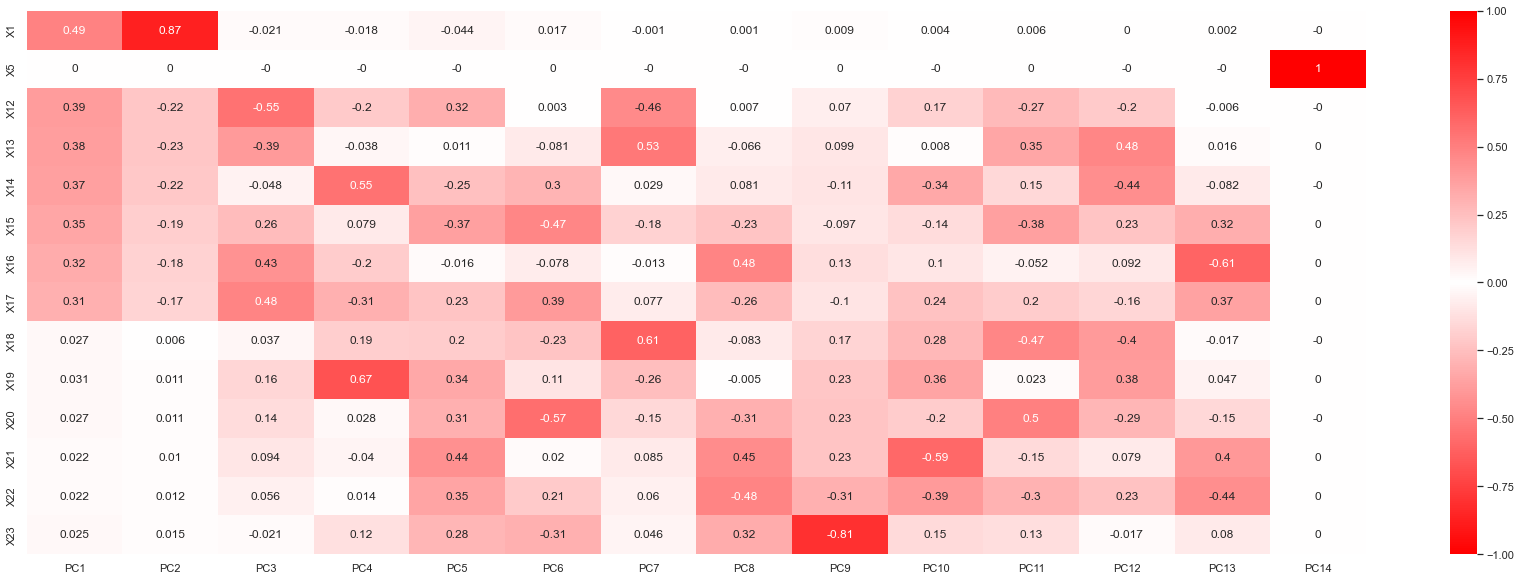

In [25]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
#con heatmap es más fácil ver la importancia de variables en los PCs
#df para los pcs
pcs_comps = pd.DataFrame(
    columnasTransformer.named_transformers_['pca_pipe']['PCA'].components_.round(3), 
    columns = pipeline_nombres, 
    index = componentes)
#se obtiene la T para la visualización
pcs_comps = pcs_comps.transpose()
#tamaño del gráfico
sns.set(rc = {'figure.figsize':(30,10)})
cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','white','red'])
#valores de -1 a 1, dependiendo la magnitud y si es relación inversamente proporcional o no
sns.heatmap(pcs_comps.iloc[:,:], vmin = -1, vmax = 1, cmap =cmap, annot= True)

En el heatmap anterior, el eje horizontal contiene a los PCs, mientras que el vertical, a las variables de entrada originales. Cada una de las casillas contiene un valor en el rango -1 a 1, cuyo color se intensifica a medida en que este valor incrementa en magnitud. Valores positivos indican proporcionalidad directa entre el PCx y la variable de entrada, mientras que valores negativos, proporcionalidad inversa.

Es importante recordar que los componentes principales 1 y 2 contienen el 90% de la varianza total del conjunto de datos. Gran parte de estos componentes están determinados por X1 y X12 a X17. Esto es historial crediticio y cuánto se debe con anterioridad. Esto es muy interesante, pues muestra que estas variables representan en gran cantidad la variabilidad del dataset.

Otro aspecto interesante es el PC14. Este componente principal añade muy poco a la varianza del conjunto de datos, y a su vez está fuertemente influenciado por la variable X5, edad. Esto sugiere que la edad no contribuye a la variabilidad del conjunto de datos.

### **8. Elabora los histogramas de los atributos para visualizar su distribución.**

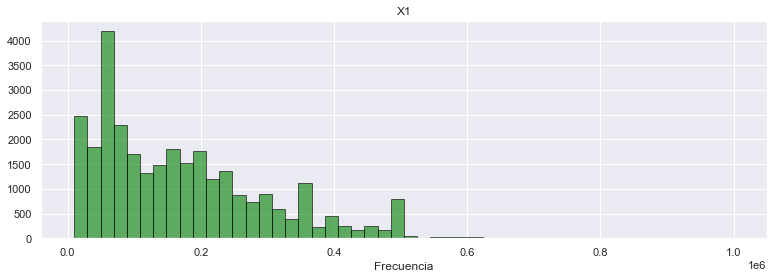

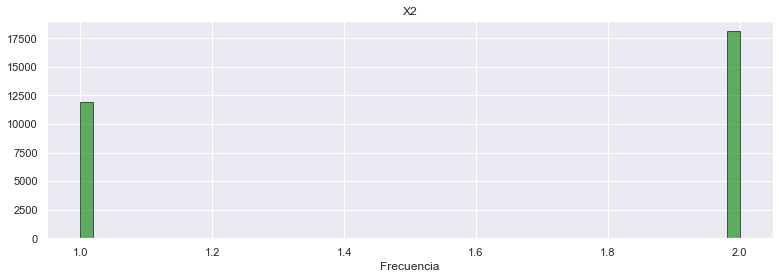

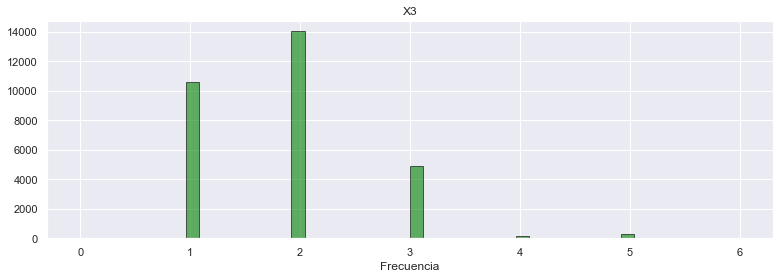

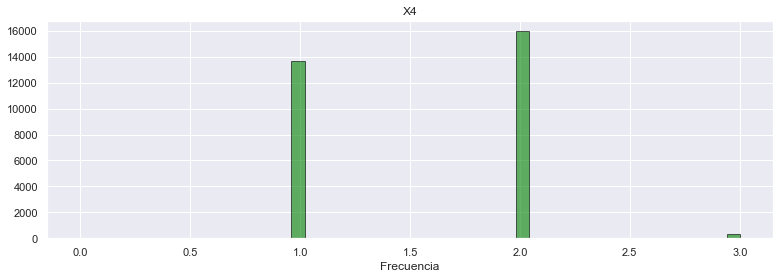

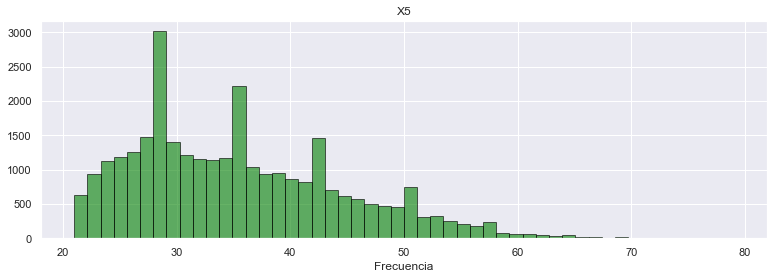

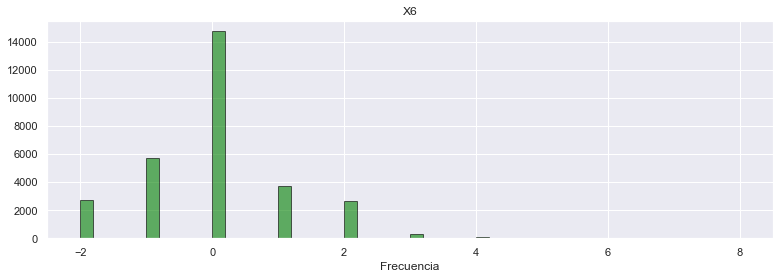

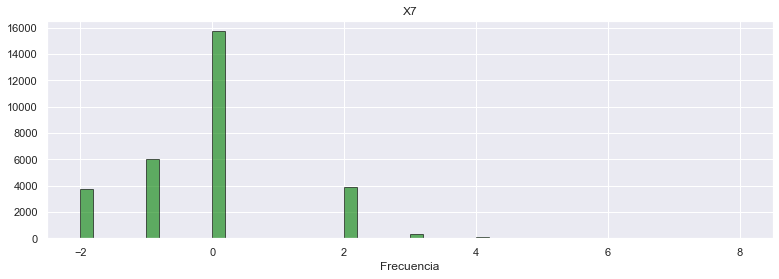

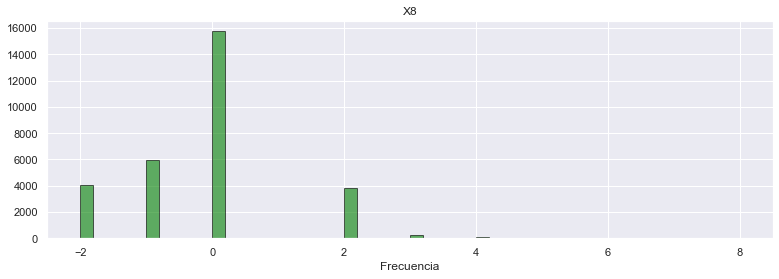

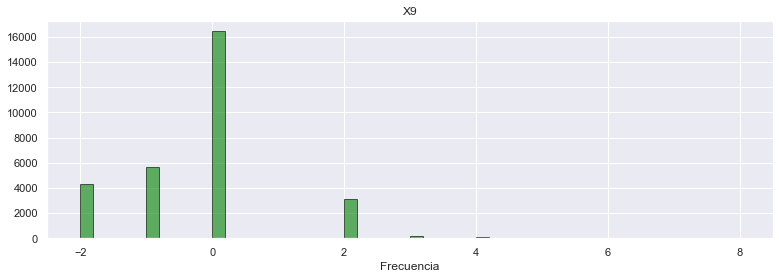

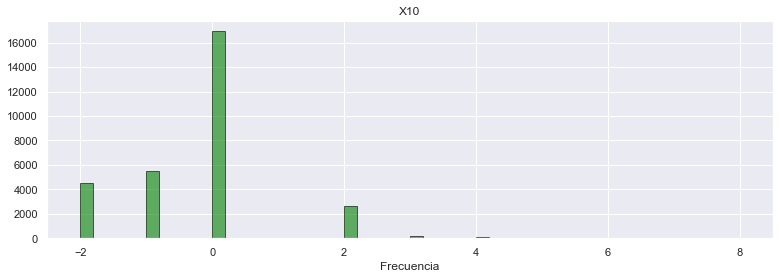

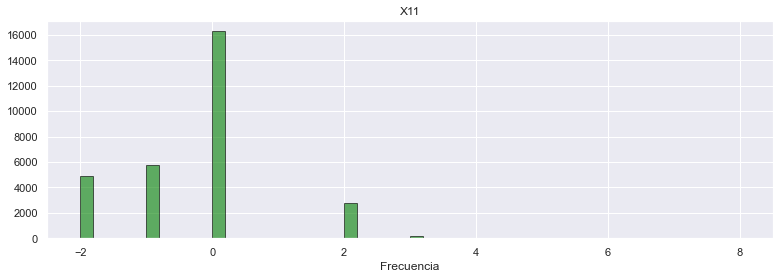

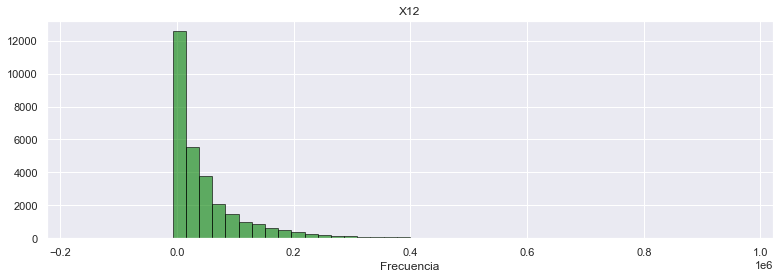

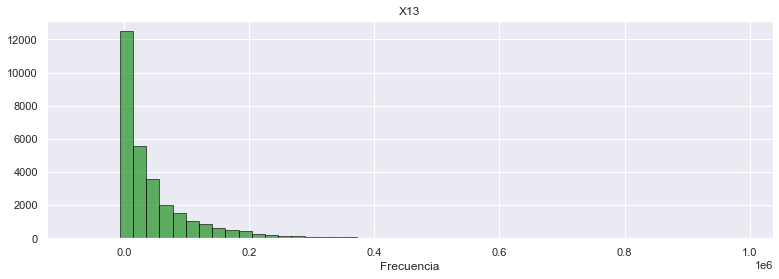

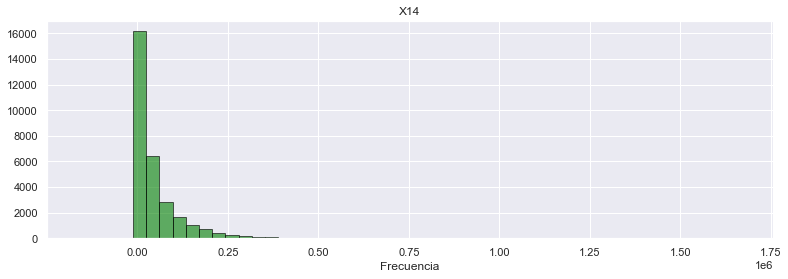

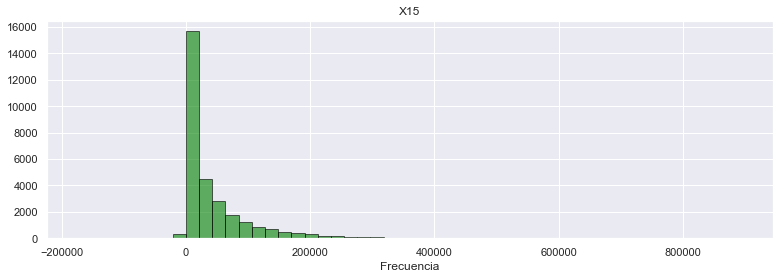

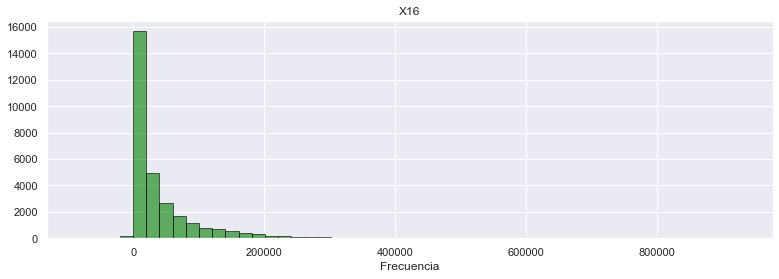

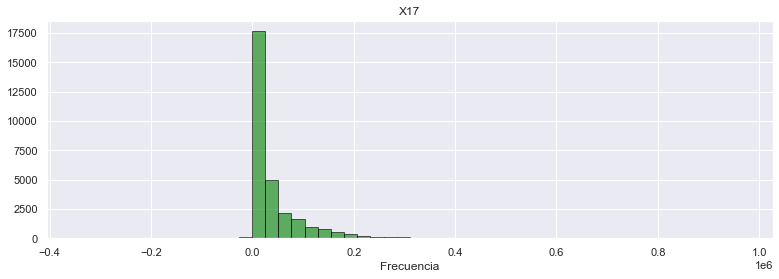

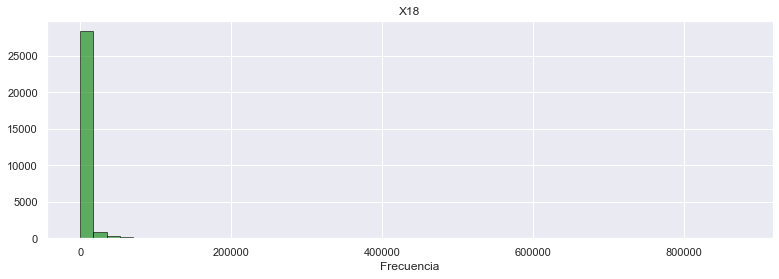

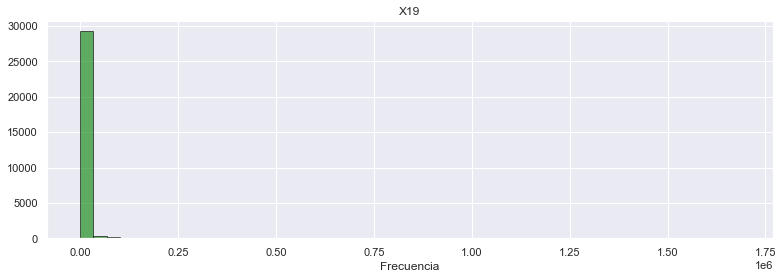

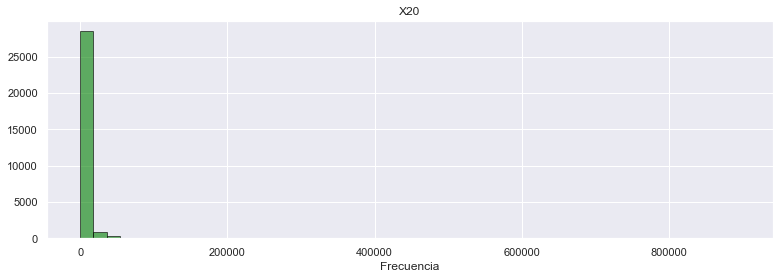

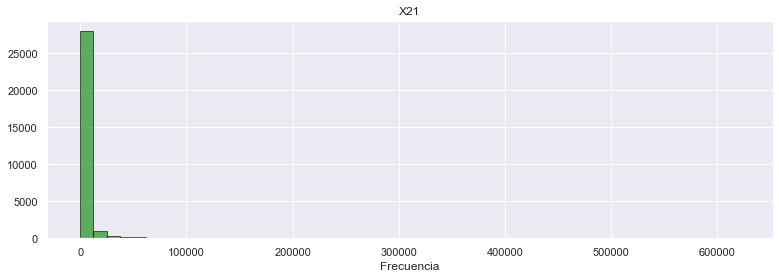

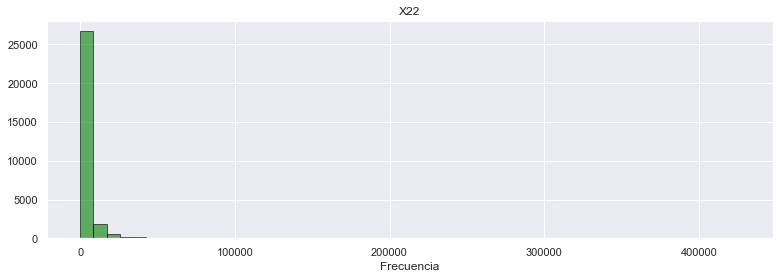

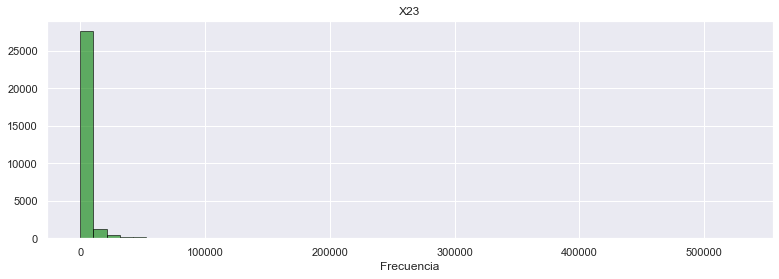

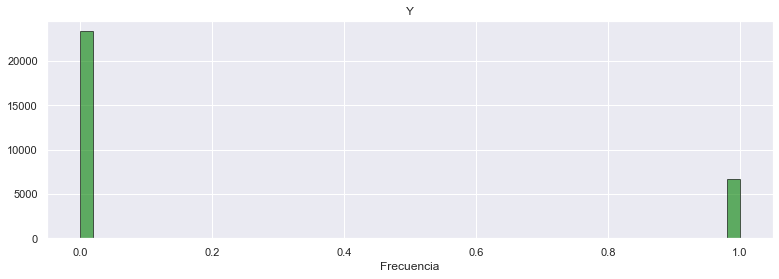

In [26]:
import matplotlib.pyplot as plt
for col in df_manipulate.columns.to_list(): #atributos de entrada y valor de salida
    plt.figure(figsize=(13,4)) #tamaño de las gráficas
    n,bins,patch = plt.hist(df[col],bins=50, color='green', alpha=0.6, label='Value', edgecolor='black', linewidth=1)
    plt.title(str(col))
    plt.xlabel('Valores')
    plt.xlabel('Frecuencia')
    plt.show()

### **9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**

Text(0, 0.5, 'Varianza contenida')

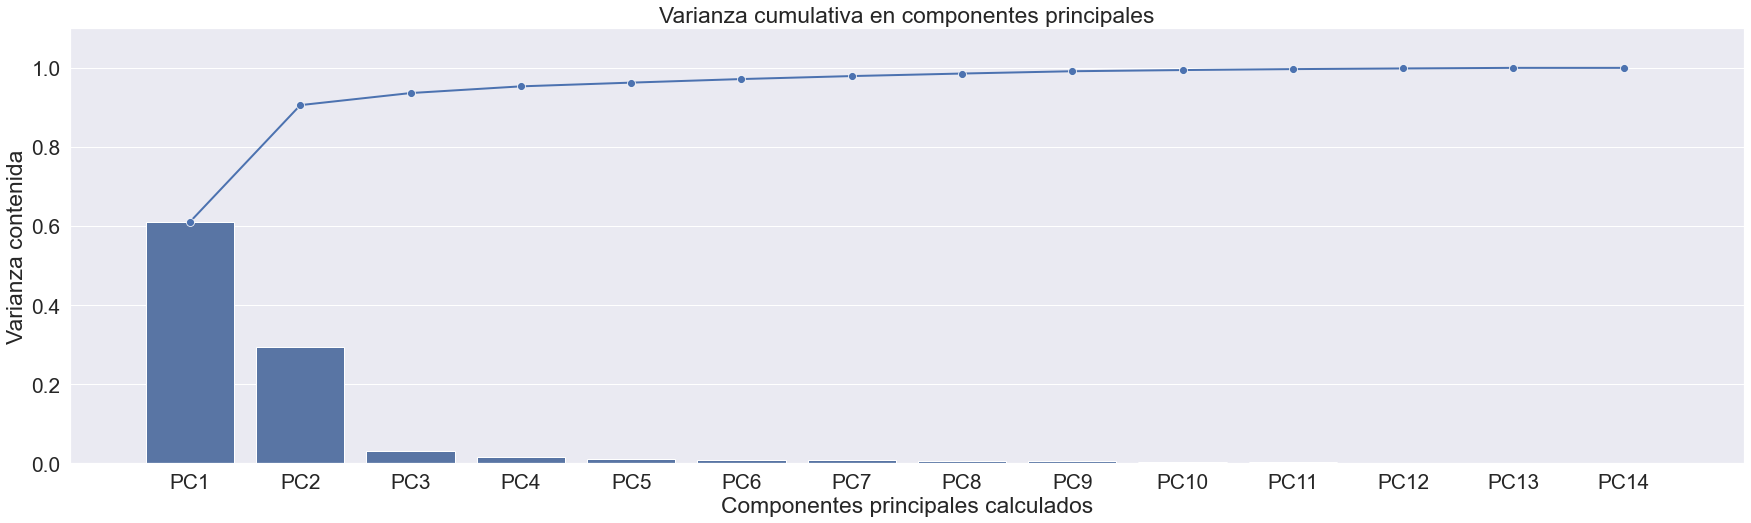

In [27]:
import seaborn as sns
#tamaño de la figura
sns.set(rc = {'figure.figsize':(30,8)})
sns.set(font_scale = 1.9)
#barplot con los 14 PCs calculados
sns.barplot(x = componentes, y = columnasTransformer.named_transformers_['pca_pipe']['PCA'].explained_variance_ratio_, color = 'b')
#grafica de lineas para varianza cumulativa
sns.lineplot(
    x = componentes, 
    y = np.cumsum(columnasTransformer.named_transformers_['pca_pipe']['PCA'].explained_variance_ratio_),
    marker= "o",
    markersize = 8,
    linewidth = 2)
plt.ylim(0,1.1)
plt.title("Varianza cumulativa en componentes principales")
plt.xlabel("Componentes principales calculados")
plt.ylabel("Varianza contenida")

Text(0, 0.5, 'Valores')

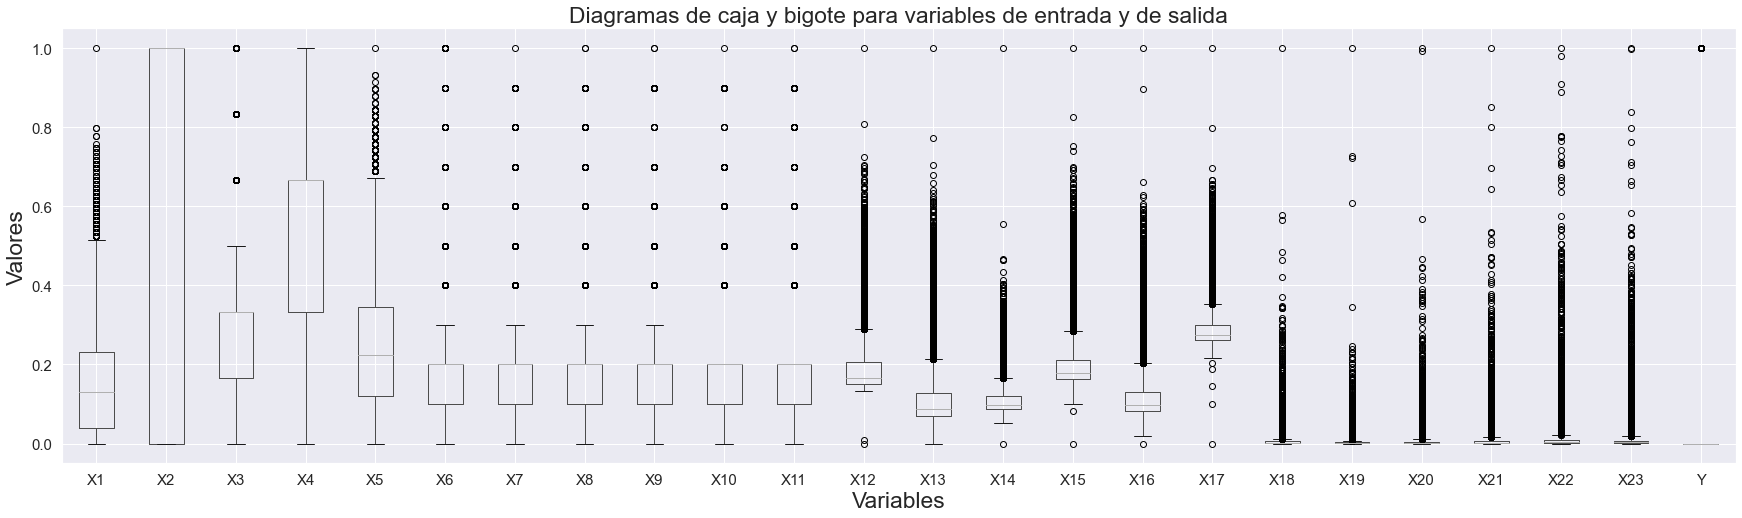

In [28]:
from sklearn.preprocessing import MinMaxScaler
#scaler de min max para llevar a una misma escala
scaler = MinMaxScaler()
#todas las variables se incluyen para el desplegue
df_plot = pd.DataFrame(scaler.fit_transform(df_manipulate), columns = df_manipulate.columns)
b_plot = df_plot.boxplot(fontsize = 15) 
b_plot.plot()
plt.title('Diagramas de caja y bigote para variables de entrada y de salida')
plt.xlabel('Variables')
plt.ylabel('Valores')


Text(0, 0.5, 'Influencia sobre el PC')

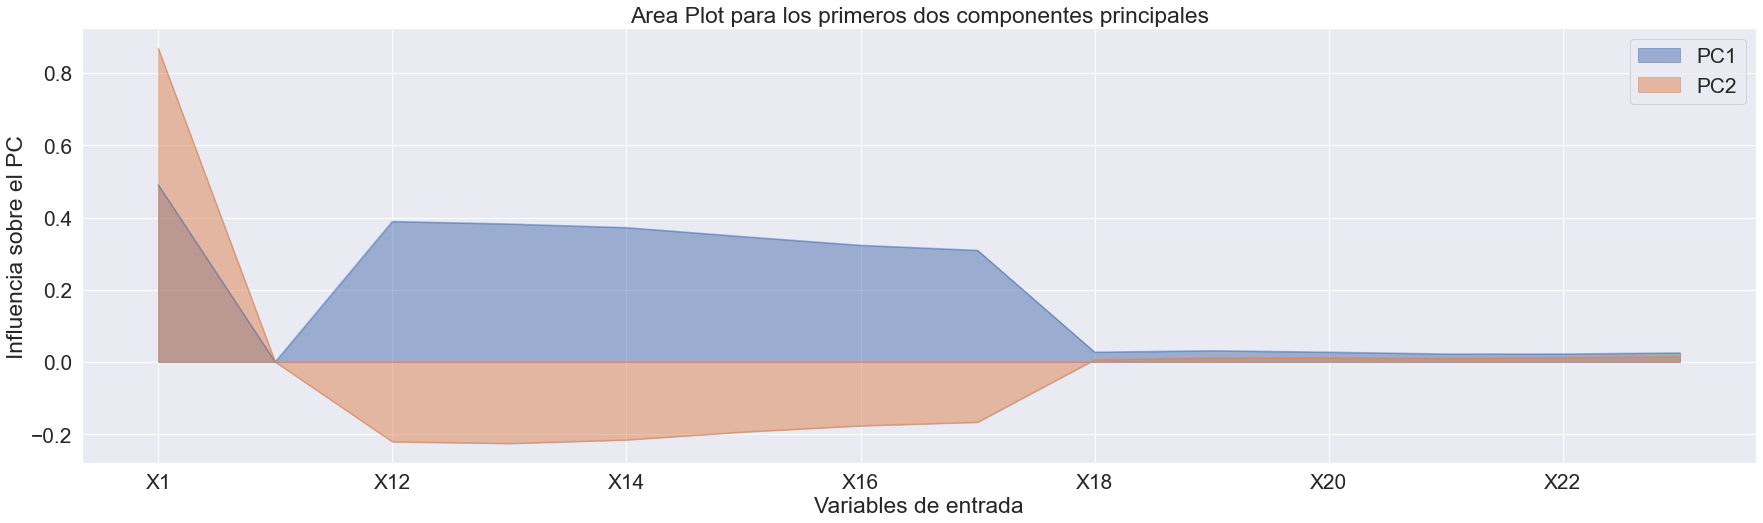

In [29]:
df_plot = pd.DataFrame(scaler.fit_transform(df_manipulate), columns = df_manipulate.columns)
g_plot = pcs_comps[['PC1','PC2']].plot.area(stacked=False)
g_plot.plot()
plt.title('Area Plot para los primeros dos componentes principales')
plt.xlabel('Variables de entrada')
plt.ylabel('Influencia sobre el PC')

### **10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**

El primer gráfico muestra dos aspectos importantes: la varianza individual que contribuye cada componente principal para explicar el conjunto de datos (gráfico de barras), así como la varianza acumulativa a medida que se agrega un componente principal más (gráfico de línea). La información más relevante acá que puede ayudar al proceso de toma de decisiones es la manera visual de entender cuánto agrega cada PC para explicar la varianza, y poder ver visualmente dónde colocar el umbral para determinar cuáles PCs conservar.

El segundo gráfico consiste de los diagramas de caja y bigote para todas las variables del dataset. Para facilitar la visualización, se aplicó un MinMax Scaler, tal que todas las variables estuvieran en una misma escala y facilitar así la visualización. La información más relevante acá que puede ayudar al proceso de toma de decisiones es la dispersión de cada variable: incluso al estar escaladas las variables, se puede ver a través del gráfico de manera rápida cuáles son las variables con más valores atípicos o con mayor dispersión. Esto puede servir bastante para decidir si se va a seguir recolectando una variable o si es necesario levantar procesos para recolectar otras.

El tercer gráfico es un area plot para los dos primeros dos componentes principales, los cuales contienen más del 90% de la varianza del conjunto de datos. El gráfico permite ver de manera muy visual cómo contribuyen las distintas variables numéricas de entrada sobre los dos PCs al mismo tiempo. Es muy útil darse cuenta gracias a este gráfico que, principalmente, para las variables X12, X14 y X16, existe proporcionalidad positiva sobre un PC mientras que la proporcionalidad es negativa para el otro al mismo tiempo. 

 La información más relevante acá que puede ayudar al proceso de toma de decisiones es visualizar cómo cada variable influye sobre la variabilidad de los datos e identificar cuáles son las variables que más contribuyen a determinar los PCs que se estarían escogiendo. En otras palabras, es una manera pragmática de entender cómo se componen los PCs que se escogen a raíz de un análisis PCA.